# Examples of Raypath Radar Sounder Sim for Europa Clipper's REASON

In [1]:
# imports
import sys
sys.path.append("../src")

import numpy as np
import matplotlib.pyplot as plt

from surface import *
from source import *
from simulator import *
from focus import *

# EXAMPLE 1: Point Target in Subsurface

| Transit | Traces | Altitude | Target Depth | Polarization | f₀ | Power |
|---------|--------|----------|---------------|--------------|----------|-----------|
| 30 km   | 300    | 25 km    | 1 km          | h            | 9 MHz    | 11.75 W   |

| Subsurface Gain | Surface Gain | Rx Opening | Rx Window | Rx Sampling | ε₁ | ε₂  | σ₁ | σ₂       |
|------------------|---------------|------------|------------|--------------|----|-----|-----|-----------|
| 80 dB            | 64 dB         | 20 km      | 30 km      | 48 MHz       | 1  | 3.15 | 0 S | 10⁻⁶ S   |


In [2]:
# create surface
surf = Surface(origin=(4000, 4000), dims=(400, 400), fs=5, overlap=0)
surf.gen_flat(0)

In [3]:
# create sources
f0  = 9e6             # center frequency [Hz]
dt  = 1 / (8 * f0)    # time delta to avoid aliasing [s]
n   = 1000            # traces

# source list
ss = []
for x in np.linspace(-10e3, 20e3, n):
    source = Source(dt, 0.5e-6, (x, 5050, 25000))
    source.chirp(f0, 1e6)
    ss.append(source)

# target location
t = (5000, 5050, -500)   # target location (x, y, z)

In [4]:
rdrgrm, time = run_sim_ms(surf, ss, t, reflect=True, polarization='v', sltrng=False)

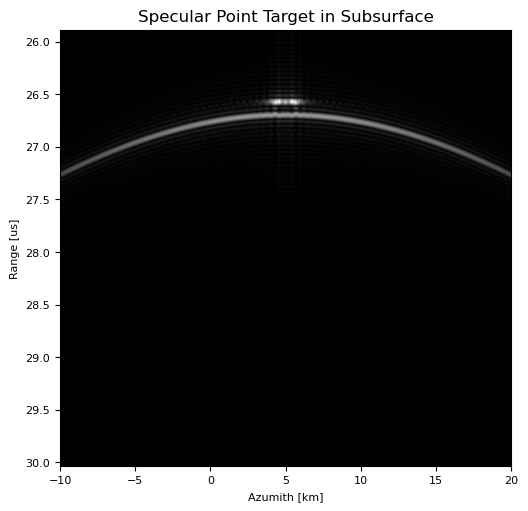

In [5]:
extent = (-10, 20, np.max(time)/1e3, np.min(time)/1e3)
fig, ax = plt.subplots(1, figsize=(10, 5), constrained_layout=True)
ax.imshow(np.abs(rdrgrm), cmap="gray", aspect=7, extent=extent)
ax.set_xlabel("Azumith [km]", fontsize=8)
ax.set_ylabel("Range [us]", fontsize=8)
ax.tick_params(labelsize=8)
ax.set_title("Specular Point Target in Subsurface")
plt.show()

## Add point target response function
*Function is a gaussian where $\sigma=3\degree$*

In [6]:
rdrgrm, time = run_sim_ms(surf, ss, t, reflect=False, polarization='v', sltrng=False, pt_response="gaussian")

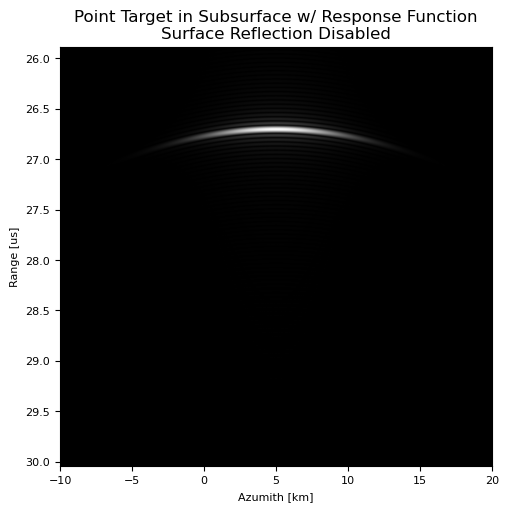

In [7]:
extent = (-10, 20, np.max(time)/1e3, np.min(time)/1e3)
fig, ax = plt.subplots(1, figsize=(10, 5), constrained_layout=True)
ax.imshow(np.abs(rdrgrm), cmap="gray", aspect=7, extent=extent)
ax.set_xlabel("Azumith [km]", fontsize=8)
ax.set_ylabel("Range [us]", fontsize=8)
ax.tick_params(labelsize=8)
ax.set_title("Point Target in Subsurface w/ Response Function\nSurface Reflection Disabled")
plt.show()

## Sinusoid Surface

In [8]:
# define sinusoidal surface
surf = Surface(origin=(4000, 4000), dims=(400, 400), fs=5, overlap=0)

amp = 10    # amplitude [m]
per = 20    # periods   [m]
z   = 0     # center z  [m]
surf.gen_sin('x', amp, per, z)

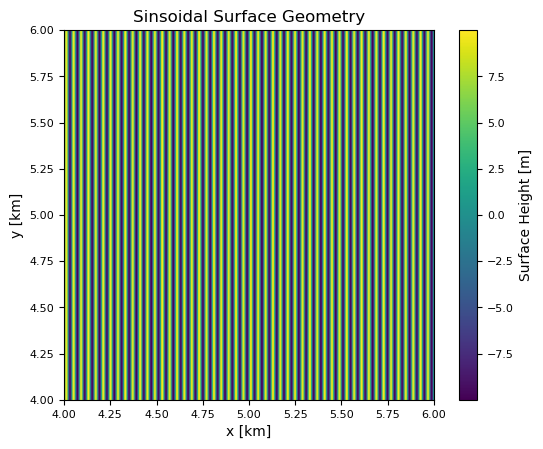

In [9]:
# plot surface
plt.imshow(surf.zs, origin="lower", extent=(4, 6, 4, 6))
cb = plt.colorbar(label="Surface Height [m]")
cb.ax.tick_params(labelsize=8)
plt.xlabel("x [km]")
plt.ylabel("y [km]")
plt.tick_params(labelsize=8)
plt.title("Sinsoidal Surface Geometry")
plt.show()

In [10]:
rdrgrm, time = run_sim_ms(surf, ss, t, reflect=False, polarization='v', sltrng=False)

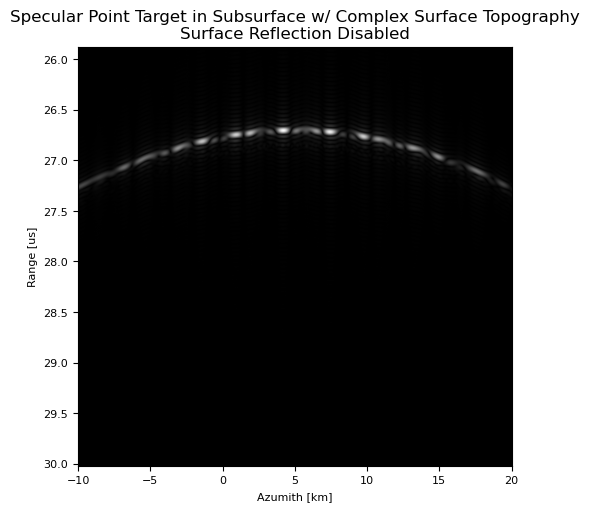

In [11]:
extent = (-10, 20, np.max(time)/1e3, np.min(time)/1e3)
fig, ax = plt.subplots(1, figsize=(10, 5), constrained_layout=True)
ax.imshow(np.abs(rdrgrm), cmap="gray", aspect=7, extent=extent)
ax.set_xlabel("Azumith [km]", fontsize=8)
ax.set_ylabel("Range [us]", fontsize=8)
ax.tick_params(labelsize=8)
ax.set_title("Specular Point Target in Subsurface w/ Complex Surface Topography\nSurface Reflection Disabled")
plt.show()